In [17]:
#imports
import pandas as pd
import numpy as np 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
# import seaborn as sns
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
#from statsmodels import robust

In [18]:
#import csv and assign the attributes
col_names = ["Gender","Age","Debt","Married","BankCustomer","EducationLevel","Ethnicity","YearsEmployed","PriorDefault","Employed","CreditScore", "DriversLicense", "Citizen", "ZipCode", "Income" , "ApprovalStatus"]
dataset = pd.read_csv("datasets/crx.data", header=None, names=col_names);
dataframe = dataset.copy()
#dataset.head(10)

In [19]:
#replace missing numeric values with mean
dataset = dataset.replace("?", np.nan)
dataset.fillna(dataset.mean(), inplace=True)

#replace missing object values with the most freequent value
for col in dataset:
    if dataset[col].dtypes == 'object':
        dataset = dataset.fillna(dataset[col].value_counts().index[0])

In [20]:
#encode values for the algorithm
#ohe = preprocessing.OneHotEncoder()

le = preprocessing.LabelEncoder()

for col in dataset:
    if dataset[col].dtypes == 'object':
        dataset[col]=le.fit_transform(dataset[col])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f7df630>,
      dtype=object)

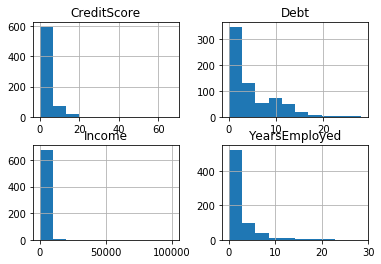

In [21]:
#ploting all non-nuisance features. we can see the data is not normally distributed hence we will use minmaxscaler
dataframe.hist()

In [22]:
#use MAD to check the spread of the observation from the mean. MAD > std because we have outliers like age, income
dataset.mad()

Gender               0.423440
Age                 82.546335
Debt                 3.941786
Married              0.370439
BankCustomer         0.727536
EducationLevel       3.875156
Ethnicity            2.395346
YearsEmployed        2.223883
PriorDefault         0.498925
Employed             0.489498
CreditScore          3.088116
DriversLicense       0.496467
Citizen              0.320311
ZipCode             40.415312
Income            1533.165402
ApprovalStatus       0.493934
dtype: float64

In [23]:
#pearsons correlation in relation to the target to see if we can get rid of features
dataset.corr()["ApprovalStatus"].sort_values(ascending=False)

ApprovalStatus    1.000000
Married           0.191431
BankCustomer      0.187520
Citizen           0.100867
ZipCode           0.094851
Gender            0.028934
Ethnicity        -0.000877
DriversLicense   -0.031625
EducationLevel   -0.130026
Age              -0.133304
Income           -0.175657
Debt             -0.206294
YearsEmployed    -0.322475
CreditScore      -0.406410
Employed         -0.458301
PriorDefault     -0.720407
Name: ApprovalStatus, dtype: float64

In [24]:
#drop columns with the lowest correlation, or columns that do not make sense
dataset = dataset.drop(['DriversLicense', 'ZipCode', 'Ethnicity', 'Gender'], axis=1)

In [25]:
#separate the features and labels
dataset = dataset.values
X,y = dataset[:,0:11] , dataset[:,11]

#split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [26]:
#rescale the training and testing sets
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)
rescaledX_val = scaler.fit_transform(X_val)

In [27]:
#instantiate the algorithms
rfc = RandomForestClassifier(random_state=42, n_estimators=100)
gnb = GaussianNB()
logreg = LogisticRegression(solver='liblinear')

In [28]:
#use cross validation with 5 folds on the training data, since we have low amount of data
#produce the AUC score for each of the algorithms
print("Random Forrest")
roc_rfc = cross_val_score(rfc, X_train, y_train, scoring='roc_auc', cv = 5).mean()
f1_rfc = cross_val_score(rfc, X_train, y_train, scoring='f1', cv = 5).mean()
precision_rfc = cross_val_score(rfc, X_train, y_train, scoring='precision', cv = 5).mean()
rec_rfc = cross_val_score(rfc, X_train, y_train, scoring='recall', cv = 5).mean()
print("AUC: " , roc_rfc)
print("F1: " , f1_rfc)
print("Precission: " , precision_rfc)
print("Recall: " , rec_rfc)

print("Naive Bayes")
roc_gnb = cross_val_score(gnb, X_train, y_train, scoring='roc_auc', cv = 5).mean()
f1_gnb = cross_val_score(gnb, X_train, y_train, scoring='f1', cv = 5).mean()
precision_gnb = cross_val_score(gnb, X_train, y_train, scoring='precision', cv = 5).mean()
rec_gnb = cross_val_score(gnb, X_train, y_train, scoring='recall', cv = 5).mean()
print("AUC of Naive Bayes is: " , roc_gnb)
print("F1: " , f1_gnb)
print("Precission: " , precision_gnb)
print("Recall: " , rec_gnb)

print("Logistic regression")
roc_logreg = cross_val_score(logreg, X_train, y_train, scoring='roc_auc', cv = 5).mean()
f1_logreg = cross_val_score(logreg, X_train, y_train, scoring='f1', cv = 5).mean()
precision_logreg = cross_val_score(logreg, X_train, y_train, scoring='precision', cv = 5).mean()
rec_logreg = cross_val_score(logreg, X_train, y_train, scoring='recall', cv = 5).mean()
print("AUC of Logistic Regression is: " , roc_logreg)
print("F1: " , f1_logreg)
print("Precission: " , precision_logreg)
print("Recall: " , rec_logreg)


Random Forrest
AUC:  0.9181401277438429
F1:  0.8644031891609899
Precission:  0.8805805121755232
Recall:  0.8534901960784314
Naive Bayes
AUC of Naive Bayes is:  0.8767135804535184
F1:  0.8275527821733011
Precission:  0.7521033115399609
Recall:  0.9207843137254901
Logistic regression
AUC of Logistic Regression is:  0.9191576158201545
F1:  0.8744763848722872
Precission:  0.9102171435061802
Recall:  0.8531764705882352


In [29]:
#use gridsearch to find best parameters for RandomForest
parameters = { 'max_features':np.arange(5,11),'n_estimators':[10,50,100,200,500],'min_samples_leaf': [10,50,100,200,500]}

random_grid = GridSearchCV(rfc, parameters, cv = 5)
random_grid_result = random_grid.fit(rescaledX_train, y_train)

print("Best:", random_grid_result.best_params_)

Best: {'max_features': 5, 'min_samples_leaf': 50, 'n_estimators': 100}


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
#instantiate RFC with the best parameters
rfc_best_model = RandomForestClassifier(max_features=5,min_samples_leaf=10,n_estimators=10,random_state=42)
#fit the test data
rfc_best_model.fit(X_train, y_train)
#predict
y_pred = rfc_best_model.predict(X_test)


In [31]:
#print the metrics
print("AUC: " ,  metrics.roc_auc_score(y_test,y_pred))
print("F1: " , metrics.f1_score(y_test,y_pred))
print("Precission: " , metrics.precision_score(y_test,y_pred))
print("Recall: " ,  metrics.recall_score(y_test,y_pred))

AUC:  0.8857142857142857
F1:  0.8904109589041095
Precission:  0.9154929577464789
Recall:  0.8666666666666667


In [47]:
# Create logistic regression
logistic = LogisticRegression(solver='liblinear')

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fit grid search
log_grid_result = clf.fit(rescaledX_train, y_train)

# View best hyperparameters
print("Best:", log_grid_result.best_params_)

Best: {'C': 21.544346900318832, 'penalty': 'l1'}


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [48]:
logistic = LogisticRegression(C=21.544346900318832, penalty='l1')
logistic.fit(rescaledX_train, y_train)
y_pred_val= logistic.predict(rescaledX_val)


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


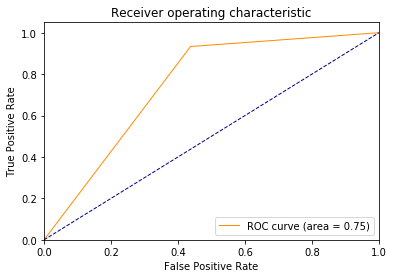

In [49]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_pred_val, y_val)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [35]:
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr+(1-fpr), index=i), 'threshold' : pd.Series(thresholds, index=i)})
roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]
print(list(roc_t['threshold']))

[2.0]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
threshold = 2.0

predicted_proba = logistic.predict_proba(rescaledX_test)
predicted = (predicted_proba [:,1] >= threshold).astype('bool')

accuracy = accuracy_score(y_test, predicted)
print(accuracy)

0.45652173913043476


In [37]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.loc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 


# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_val, y_val)
print (threshold)


[1.0]


In [38]:
threshold = 1.0

predicted_proba = logistic.predict_proba(rescaledX_test)
predicted = (predicted_proba [:,1] >= threshold).astype('bool')

accuracy = accuracy_score(y_test, predicted)
print(accuracy)

0.45652173913043476


In [39]:
print(logistic.coef_.shape)
print("Model coefficients: ", logistic.intercept_, logistic.coef_)
print("Score", logistic.score(rescaledX_train, y_train))


(1, 11)
Model coefficients:  [-1.0270284] [[  1.12803719   0.           8.82999267  -4.33672888  -1.07569229
   -4.20059799  -3.61188898  -0.24285506  -7.66118336  -0.07004495
  -35.11964285]]
Score 0.8684807256235828


In [40]:
#instantiate LogReg with the best parameters
logistic = LogisticRegression(C=21.544346900318832, penalty='l1')
#fit the test data
logistic.fit(rescaledX_train, y_train)
#predict
y_pred= logistic.predict(rescaledX_test)

print("Logistic regression")
roc_logreg = cross_val_score(logreg, rescaledX_test, y_test, scoring='roc_auc', cv = 5).mean()
f1_logreg = cross_val_score(logreg, rescaledX_test, y_test, scoring='f1', cv = 5).mean()
precision_logreg = cross_val_score(logreg, rescaledX_test, y_test, scoring='precision', cv = 5).mean()
rec_logreg = cross_val_score(logreg, rescaledX_test, y_test, scoring='recall', cv = 5).mean()
print("AUC of Logistic Regression is: " , roc_logreg)
print("F1: " , f1_logreg)
print("Precission: " , precision_logreg)
print("Recall: " , rec_logreg)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Logistic regression
AUC of Logistic Regression is:  0.9431623931623931
F1:  0.9036001200628565
Precission:  0.9346153846153846
Recall:  0.8799999999999999
Accuracy: 0.6304347826086957


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
